<a href="https://colab.research.google.com/github/P-Sushma6/Google-Playstore-Apps-Reviews-Analysis/blob/main/Play_Store_App_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
playstoredf=pd.read_csv('/content/drive/MyDrive/df/Play Store Data.csv')

In [ ]:
playstoredf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **Let us see category wise number of paid and free apps**

In [ ]:
playstoredf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
playstoredf[playstoredf['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Removing 10472 record
playstoredf=playstoredf.drop(10472)

In [ ]:
# checking for duplicate values
playstoredf['App'].duplicated().any()

True

In [ ]:
playstoredf['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [ ]:
# Dropping Duplicate values for Apps
playstoredf.drop_duplicates(['App'],inplace=True)

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
# considering not null values of Type column
df_type_not_null=playstoredf[~playstoredf['Type'].isnull()]
df_type_not_null

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
appcount_type=df_type_not_null.groupby(['Category','Type'])['App'].count().unstack().sort_values(by=['Free','Paid'],ascending=False).fillna(0)
appcount_type

Type,Free,Paid
Category,,
FAMILY,1648.0,183.0
GAME,877.0,82.0
TOOLS,749.0,78.0
BUSINESS,408.0,12.0
LIFESTYLE,350.0,19.0
PRODUCTIVITY,346.0,28.0
FINANCE,328.0,17.0
MEDICAL,312.0,83.0
SPORTS,301.0,24.0


Text(0.5, 1.0, 'Category wise number of Free and Paid Apps')

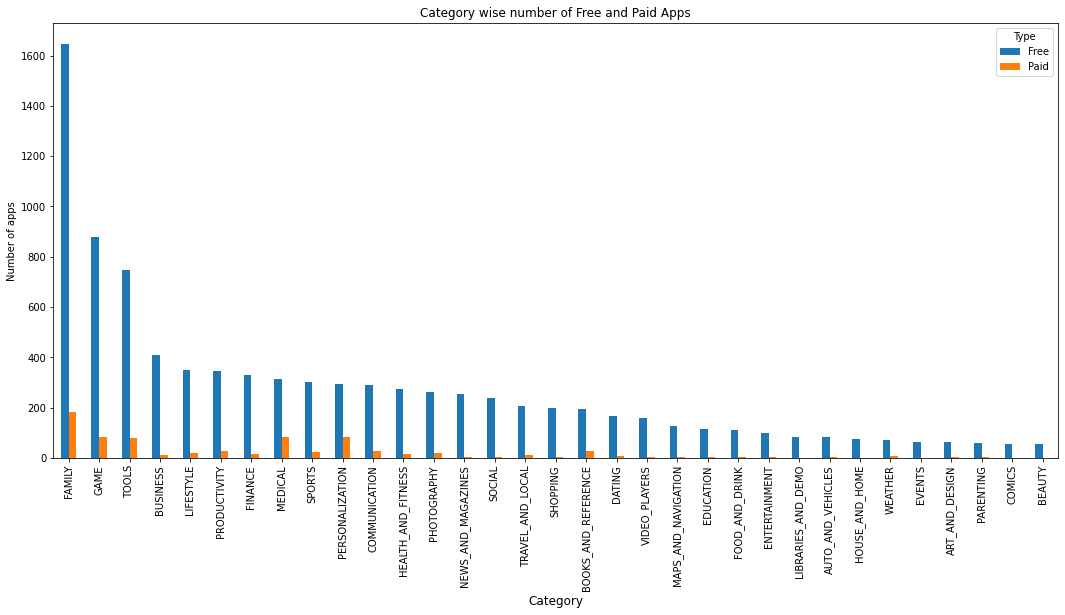

In [ ]:
plt.rcParams['figure.figsize']=(18,8)
appcount_type.plot(kind='bar')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of apps')
plt.title('Category wise number of Free and Paid Apps')


In [ ]:
playstoredf[playstoredf['Category']=='SOCIAL'].head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,5.000000e+08,Free,0.0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,4.4,49173,4.0M,1.000000e+07,Free,0.0,Everyone,Social,"June 4, 2018",1.24,4.1 and up
2548,Tumblr,SOCIAL,4.4,2955326,Varies with device,1.000000e+08,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
2549,All Social Networks,SOCIAL,4.2,22492,1.5M,1.000000e+06,Free,0.0,Everyone,Social,"May 21, 2018",2.4.12,4.0 and up
2550,Snapchat,SOCIAL,4.0,17014787,Varies with device,5.000000e+08,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
2551,Social network all in one 2018,SOCIAL,4.3,1403,3.7M,1.000000e+05,Free,0.0,Everyone,Social,"January 30, 2018",1.0,4.0 and up
2552,Pinterest,SOCIAL,4.6,4305441,Varies with device,1.000000e+08,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2553,TextNow - free text + calls,SOCIAL,4.4,441189,Varies with device,1.000000e+07,Free,0.0,Everyone,Social,"August 3, 2018",Varies with device,Varies with device


### **Category wise paid apps**

In [ ]:
# Filtering paid apps from Type Column
paid_apps=df_type_not_null[df_type_not_null['Type']=='Paid']
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [ ]:
# Category wise counting paid apps
paid_apps_count=paid_apps.groupby('Category')['App'].count().sort_values(ascending = False).reset_index()
paid_apps_count

,Category,App
0,FAMILY,183
1,MEDICAL,83
2,GAME,82
3,PERSONALIZATION,81
4,TOOLS,78
5,BOOKS_AND_REFERENCE,28
6,PRODUCTIVITY,28
7,COMMUNICATION,27
8,SPORTS,24
9,LIFESTYLE,19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


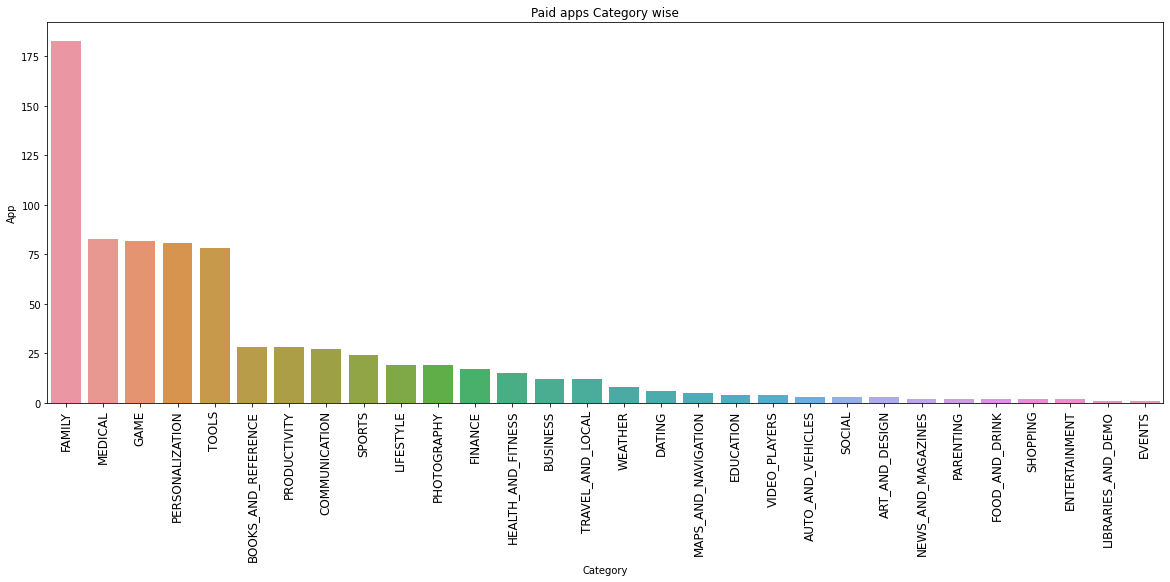

In [ ]:

plt.figure(figsize=(20,7))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Paid apps Category wise')
sns.barplot(paid_apps_count.Category,paid_apps_count.App)
plt.show()

In [ ]:
# Just uploaded first Commit

### **Let us see category wise top 10 paid apps that are installed by the users**

In [ ]:
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x:x.replace('+',''))

In [ ]:
playstoredf['Installs']=playstoredf['Installs'].apply(lambda x:x.replace(',',''))

In [ ]:
playstoredf['Installs']=playstoredf['Installs'].astype(dtype=float)

In [ ]:
playstoredf.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
paid_apps=playstoredf[playstoredf['Type']=='Paid']

In [ ]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 234 to 10798
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             756 non-null    object 
 1   Category        756 non-null    object 
 2   Rating          604 non-null    float64
 3   Reviews         756 non-null    object 
 4   Size            756 non-null    object 
 5   Installs        756 non-null    float64
 6   Type            756 non-null    object 
 7   Price           756 non-null    object 
 8   Content Rating  756 non-null    object 
 9   Genres          756 non-null    object 
 10  Last Updated    756 non-null    object 
 11  Current Ver     754 non-null    object 
 12  Android Ver     755 non-null    object 
dtypes: float64(2), object(11)
memory usage: 82.7+ KB


In [ ]:
paid_apps['log_installs']=np.log10(paid_apps['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
paid_installed_apps=paid_apps.groupby('Category')['log_installs'].sum().reset_index().sort_values('log_installs',ascending=False)
paid_installed_apps

,Category,log_installs
12,GAME,313.38764
26,TOOLS,230.07631
4,COMMUNICATION,80.19382
25,SPORTS,77.29073
21,PHOTOGRAPHY,62.79588
13,HEALTH_AND_FITNESS,53.49485
2,BOOKS_AND_REFERENCE,43.59176
29,WEATHER,33.09691
3,BUSINESS,31.09691
16,MAPS_AND_NAVIGATION,18.00000


In [ ]:
top_paid_installed_apps=paid_installed_apps[0:11]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


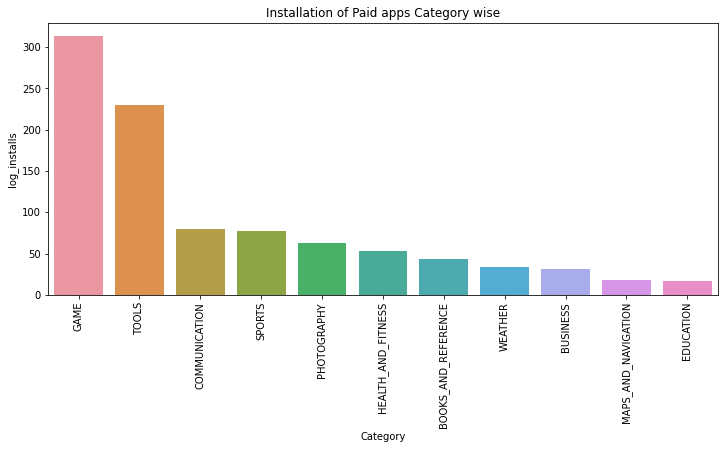

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Installation of Paid apps Category wise')
sns.barplot(top_paid_installed_apps.Category,top_paid_installed_apps.log_installs)
plt.show()

### **Category wise average rating for paid apps**

In [ ]:
playstoredf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
playstoredf[playstoredf['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000.0,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100000.0,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,50000.0,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000.0,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000.0,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000.0,Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100.0,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000.0,Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10.0,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
# Replacing null values with the median value of Ratings
playstoredf.loc[playstoredf['Rating'].isnull(),'Rating']=playstoredf['Rating'].median()

In [ ]:
# Category wise average rating for paid apps
paid_apps_average_rating=playstoredf[playstoredf['Type']=='Paid'].groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()
paid_apps_average_rating

,Category,Rating
0,NEWS_AND_MAGAZINES,4.800000
1,EDUCATION,4.750000
2,ART_AND_DESIGN,4.733333
3,ENTERTAINMENT,4.600000
4,SHOPPING,4.500000
5,PERSONALIZATION,4.418519
6,AUTO_AND_VEHICLES,4.400000
7,GAME,4.367073
8,HEALTH_AND_FITNESS,4.366667
9,WEATHER,4.362500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


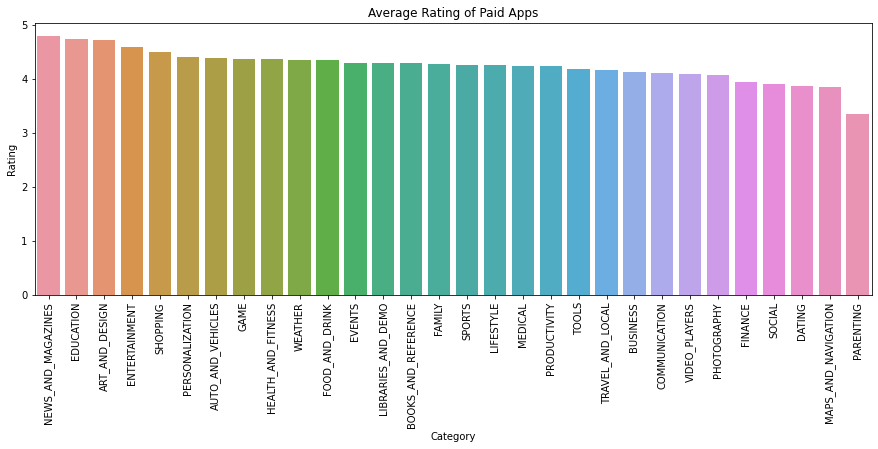

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating of Paid Apps')
sns.barplot(paid_apps_average_rating.Category,paid_apps_average_rating.Rating)
plt.show()

### **Correlation between Ratings,Price and Installations**

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [ ]:
playstoredf['Price']=playstoredf['Price'].apply(lambda x:x.replace('$',''))

In [ ]:
playstoredf['Price']=playstoredf['Price'].astype(dtype=float)

In [ ]:
Rating_installs_price=playstoredf.loc[:,['Rating','Installs','Price']]

In [ ]:
corr=Rating_installs_price.corr()

In [ ]:
corr

,Rating,Installs,Price
Rating,1.000000,0.034307,-0.018662
Installs,0.034307,1.000000,-0.009405
Price,-0.018662,-0.009405,1.000000


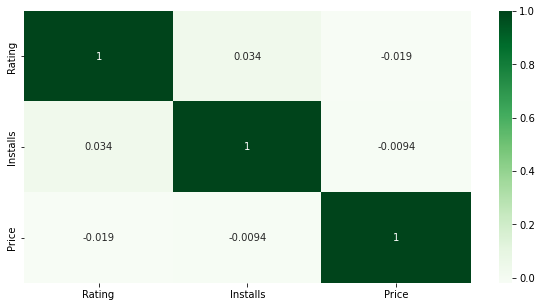

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True, cmap='Greens')

### **Category wise Content Rating(Everyone,Teens)**

In [ ]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [ ]:
playstoredf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstoredf['Content Rating'].unique() 

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
Content_rating=playstoredf[(playstoredf['Content Rating']=='Everyone') | (playstoredf['Content Rating']=='Teen')]

In [ ]:
Category_Content_rating=Content_rating.groupby(['Category','Content Rating'])['Installs'].sum().reset_index().fillna(0).sort_values('Installs',ascending=False)

In [ ]:

Category_Content_rating

,Category,Content Rating,Installs
12,COMMUNICATION,Everyone,1.002355e+10
28,GAME,Everyone,8.455430e+09
57,TOOLS,Everyone,7.941697e+09
49,PRODUCTIVITY,Everyone,5.783083e+09
54,SOCIAL,Teen,4.420462e+09
...,...,...,...
33,HOUSE_AND_HOME,Teen,5.100000e+05
5,BEAUTY,Teen,2.500000e+05
9,BUSINESS,Teen,1.029300e+05
40,MEDICAL,Teen,6.111000e+04


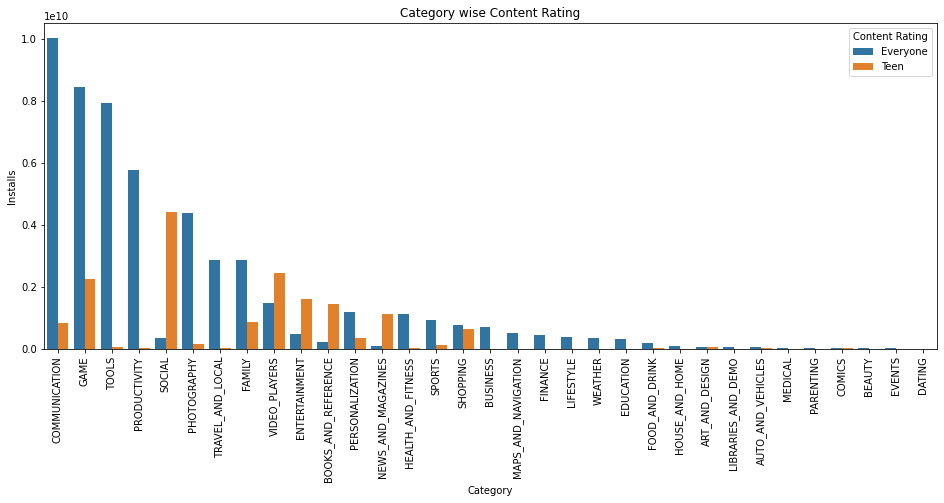

In [ ]:
plt.figure(figsize=(16,6))

plt.xticks(rotation=90,fontsize=10)
plt.title('Category wise Content Rating')
sns.barplot(x='Category',y='Installs',hue='Content Rating',data=Category_Content_rating)